In [1]:
import pandas as pd
test_df = pd.read_csv("Qt_70_Test_inference.csv")
test_df

,Unnamed: 0,text,label,pred
0,1151,the documentation for qdatawidgetmapper indica...,0,0
1,2586,currently moc supports qnamespace only in top ...,0,0
2,1053,in cups my printer is configured to use duplex...,0,0
3,3222,component qtqtimageformats fails to build agai...,1,1
4,22,update submodules on in code homeqtworkqtqtxml...,1,1
...,...,...,...,...
2713,1130,i have a timeline with objects in it done with...,0,1
2714,1294,compiling single module with yocto sdk works f...,0,1
2715,860,the performance of graphicsview on maemo devic...,0,0
2716,3507,after updating to qt creator half of tests of ...,0,1


In [2]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(test_df["label"].values, test_df["pred"].values)

print(cf_matrix)

[[1039  337]
 [ 250 1092]]


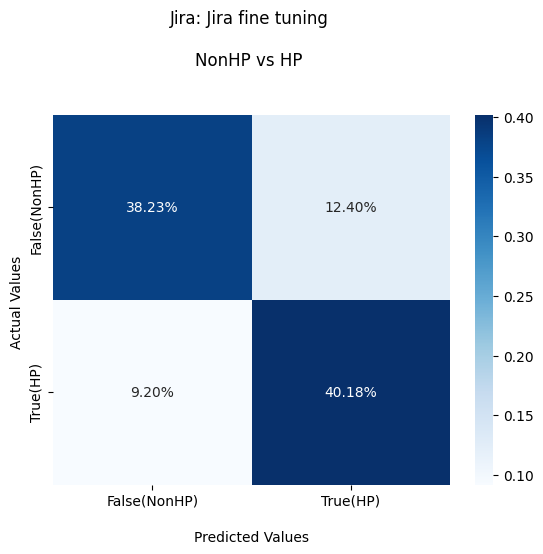

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Jira: Jira fine tuning \n\nNonHP vs HP \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False(NonHP)','True(HP)'])
ax.yaxis.set_ticklabels(['False(NonHP)','True(HP)'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [4]:
from sklearn.metrics import classification_report


print(classification_report(test_df["label"].values, test_df["pred"].values))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1376
           1       0.76      0.81      0.79      1342

    accuracy                           0.78      2718
   macro avg       0.79      0.78      0.78      2718
weighted avg       0.79      0.78      0.78      2718



In [5]:
from sklearn.metrics import matthews_corrcoef

# Calculate the Matthew's Correlation Coefficient
mcc = matthews_corrcoef(test_df["label"].values, test_df["pred"].values)
print("Matthew's Correlation Coefficient:", mcc)

Matthew's Correlation Coefficient: 0.5695095749378019
